In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial import ConvexHull

In [49]:
df = pd.read_csv("RawDataset.csv")

In [50]:
df.shape

(200, 5)

In [51]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39.0
1,2,Male,21.0,NaN,81.0
2,3,Female,20.0,16.0,6.0
3,4,Female,23.0,NaN,77.0
4,5,Female,31.0,17.0,40.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     151 non-null    float64
 3   Annual Income (k$)      160 non-null    float64
 4   Spending Score (1-100)  156 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 7.9+ KB


In [53]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,151.000000,160.000000,156.000000
mean,100.500000,38.953642,61.093750,51.211538
std,57.879185,14.602894,26.068559,25.520898
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.000000,42.750000,35.000000
50%,100.500000,35.000000,62.000000,51.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [54]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                       49
Annual Income (k$)        40
Spending Score (1-100)    44
dtype: int64

## Handling Missing Values

In [55]:
def handle_missing_values(df, variable, strategy):
    impute = SimpleImputer(missing_values=np.nan, strategy=strategy)
    impute.fit(df[[variable]])
    df[variable] = impute.transform(df[[variable]])
    df.isnull().sum()

# Age
handle_missing_values(df, "Age", "median")
# Annual Income (k$)
handle_missing_values(df, "Annual Income (k$)", "mean")
# Spending Score (1-100)
handle_missing_values(df, "Spending Score (1-100)", "mean")

df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Encoding Categorical Variable - Gender

In [56]:
# Binary encoding of Gender 
df['Gender'].unique()
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19.0,15.00000,39.0
1,2,0,21.0,61.09375,81.0
2,3,1,20.0,16.00000,6.0
3,4,1,23.0,61.09375,77.0
4,5,1,31.0,17.00000,40.0
...,...,...,...,...,...
195,196,1,35.0,120.00000,79.0
196,197,1,45.0,126.00000,28.0
197,198,0,32.0,126.00000,74.0
198,199,0,32.0,137.00000,18.0


In [57]:
# Dropping CustomerID, Gender, Age
df.drop('CustomerID', axis=1, inplace=True)
df.drop('Gender', axis=1, inplace=True)
df.drop('Age', axis=1, inplace=True)

## Handling Outliers

C:\Users\ayat2\AppData\Local\Temp\ipykernel_15356\1509355988.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
c:\Users\ayat2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ayat2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

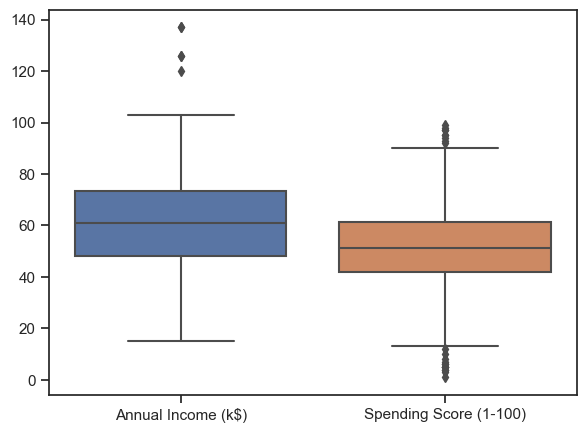

In [58]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df)

In [59]:
def handle_outliers(df, IQR, variable):
    lower_bridge = df[variable].quantile(0.25) - (IQR*1.5)
    upper_bridge = df[variable].quantile(0.75) + (IQR*1.5)
    
    df.loc[df[variable] >= upper_bridge, variable] = upper_bridge
    df.loc[df[variable] <= lower_bridge, variable] = lower_bridge

In [60]:
# IQR_Age = df.Age.quantile(0.75)-df.Age.quantile(0.25)
IQR_Annual_Income = df['Annual Income (k$)'].quantile(0.75) - df['Annual Income (k$)'].quantile(0.25)
IQR_Spending_Score = df['Spending Score (1-100)'].quantile(0.75) - df['Spending Score (1-100)'].quantile(0.25)

# handle_outliers(df, IQR_Age, 'Age')
handle_outliers(df, IQR_Annual_Income, 'Annual Income (k$)')
handle_outliers(df, IQR_Spending_Score, 'Spending Score (1-100)')

C:\Users\ayat2\AppData\Local\Temp\ipykernel_15356\1509355988.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
c:\Users\ayat2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ayat2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

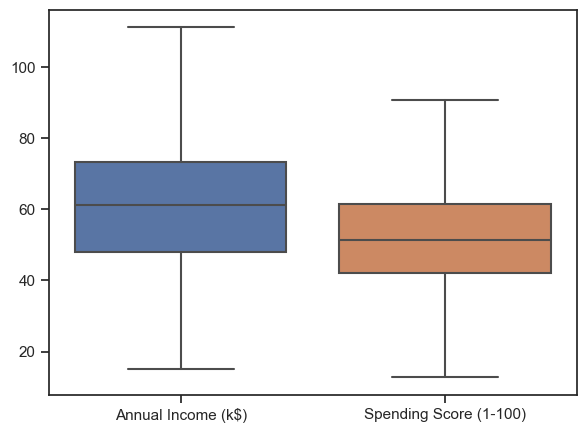

In [61]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df)

c:\Users\ayat2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ayat2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\ayat2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ayat2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ayat2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ayat2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

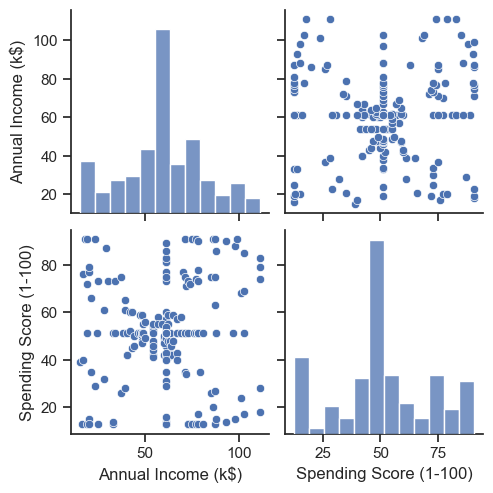

In [62]:
# Assuming df is your DataFrame
sns.set(style="ticks")

# Create a pair plot
sns.pairplot(df)

# Show the plot
plt.show()

## Feature Scaling

In [63]:
feature_scales = df.describe().loc[['min', 'max']].transpose()

print("Feature Scales:")
print(feature_scales)

Feature Scales:
                          min      max
Annual Income (k$)      15.00  111.125
Spending Score (1-100)  12.75   90.750


In [64]:
df

,Annual Income (k$),Spending Score (1-100)
0,15.00000,39.00
1,61.09375,81.00
2,16.00000,12.75
3,61.09375,77.00
4,17.00000,40.00
...,...,...
195,111.12500,79.00
196,111.12500,28.00
197,111.12500,74.00
198,111.12500,18.00


In [65]:
scaler = StandardScaler()
# X = df.values
X_scaled = scaler.fit_transform(df)

C:\Users\ayat2\AppData\Local\Temp\ipykernel_15356\2183487437.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)
c:\Users\ayat2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ayat2\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'X After Scaling')

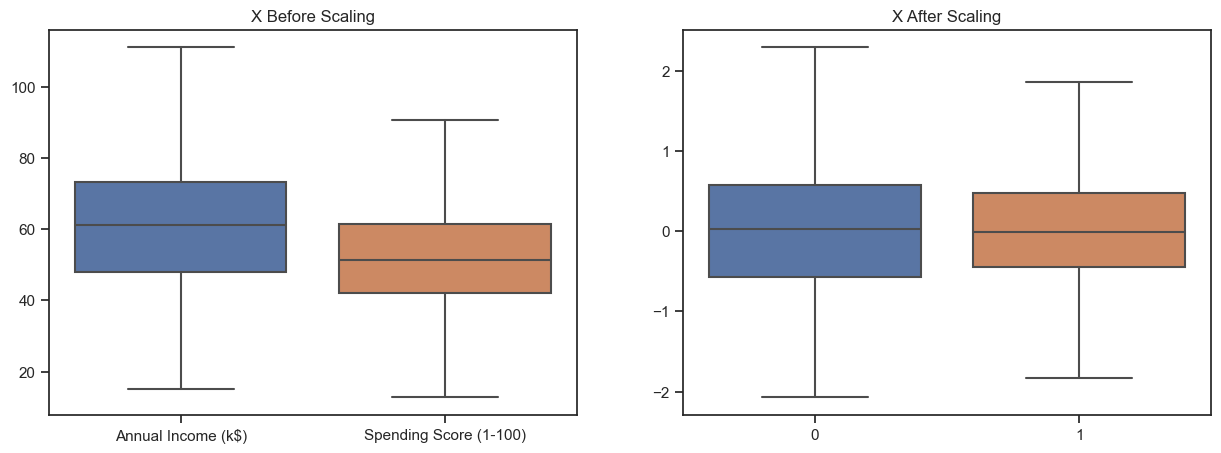

In [66]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df)
plt.title('X Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_scaled)
plt.title('X After Scaling')

## Heirarchical Clustering

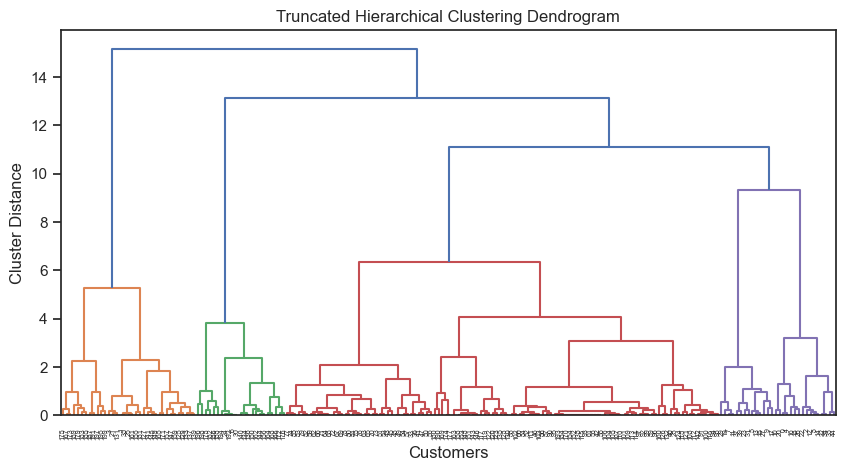

In [67]:
#Fit the model and predict
agg_clustering= AgglomerativeClustering(n_clusters=5)
pred = agg_clustering.fit_predict(X_scaled)

linkage_matrix = linkage(X_scaled, method='ward')
clusters = fcluster(linkage_matrix, t=5, criterion='distance')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Cluster Distance')

# Show the plot
plt.show()

In [68]:
silhouette_score(X_scaled, pred)

0.508556241675792

In [69]:
# !pip3 install shap

In [70]:
# import shap

# # Use SHAP to explain the model's output
# explainer = shap.Explainer(kmeans)
# shap_values = explainer.shap_values(X_scaled)

# # Summarize the effects of all the features
# shap.summary_plot(shap_values, X_scaled, feature_names=["Annual Income", "Spending Score"])

### Observations
- Feature scaling not required as the features used have approximately the same range. However, scaling the feature increases the silhouette_score by 5 percent
- Customer ID has been dropped as it does not have an effect on the clusters
- Using Age, Gender, Annual Income and Spending score to create clusters give a silhouette_score of 0.37
- Using only spending score and annual income increase the silohoette_score to 0.50
- Try: Increasing the cluster numbers, use different subset of features, different clustering algorithms etc.